### Q.1 Replicate the experiment described in the CalTech Lecture:11 Overfitting

In [91]:
# Importing libraries and important modules
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from math import log
from scipy.optimize import curve_fit

#### Model 1: 10th-order target + noise (Noisy low-order target)
#### Model 2: 50th-order target (Noiseless high-order target)

In [92]:
# Function to generate data samples of the form y = summation (aq*x^q) + ep(x) (from q=0 to Qf complexity)
# s:Noise level, q:Model Complexity, n:Data set size

#Generation of Data for Model 1 training (10th-order target + noise)
def data_generator_1(s,n,q):
    xv=np.arange(0,n) #Evenly spaced x values
    yv=[]
    for i in range(0,n):
        c=0
        for j in range(0,q+1):
              c=c+(j+1)*(xv[i]**j)
        y=c+np.random.normal(0,s) #Adds noise
        yv.append(y)
    return xv,yv

# #Generation of Data for Model 1 testing (10th-order target + noise)
def data_generator_1_test(n,q):
    xv=np.arange(0,n)
    yv=[]
    for i in range(0,n):
        c=0
        for j in range(0,q+1):
              c=c+(j+1)*(xv[i]**j)
        y=c
        yv.append(y)
    return xv,yv

# #Generation of Data for Model 2 (50th-order target, noiseless)
def data_generator_2(n,q):
    xv=np.arange(0,n)
    yv=[]
    for i in range(0,n):
        c=0
        for j in range(0,q+1):
              c=c+(j+1)*(xv[i]**j)
        y=c
        yv.append(y)
    return xv,yv

#### Performance Analysis for Model 1: 10th-order target + noise (Noisy low-order target)

In [93]:
#Generating Data for training 
N=15
X,Y=data_generator_1(1,N,10)
#Generating Data for testing 
N_test=1000
X_test,Y_test=data_generator_1_test(N_test,10)

C:\Users\Sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in long_scalars


In [94]:
# Training and Fitting a second degree polynomial to above dataset
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_poly, Y)
Y_pred_i_2=pol_reg_model.predict(X_poly)
Y_pred_o=pol_reg_model.predict(X_poly_test)

#In-Sample and Out-of-Sample errors for 2nd-degree fit
print("In-Sample error for 2nd Order fit:", mean_squared_error(Y_pred_i_2,Y))
print("Out-of-Sample error for 2nd Order fit:", mean_squared_error(Y_pred_o,Y_test))

In-Sample error for 2nd Order fit: 8.090262891995534e+17
Out-of-Sample error for 2nd Order fit: 9.908657329567871e+24


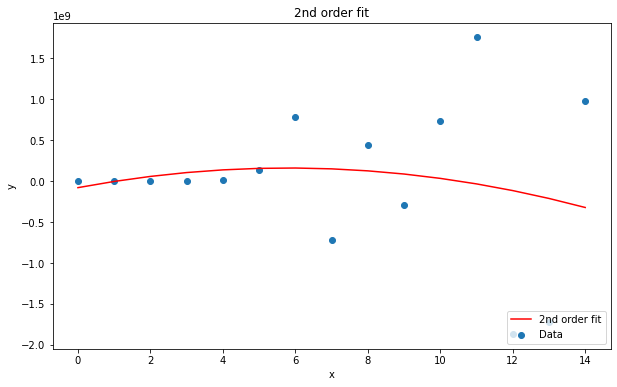

In [95]:
# Plotting the data from 10th order noisy target and the 2nd-order fit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred_i_2, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("2nd order fit")
plt.legend(["2nd order fit","Data"], loc ="lower right")
plt.show()

In [96]:
# Training and Fitting a tenth degree polynomial to above dataset
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_poly, Y)
Y_pred_i_10=pol_reg_model.predict(X_poly)
Y_pred_o=pol_reg_model.predict(X_poly_test)

#In-Sample and Out-of-Sample errors for 10th-degree fit
print("In-Sample error for 10th Order fit:", mean_squared_error(Y_pred_i_10,Y))
print("Out-of-Sample error for 10th Order fit:", mean_squared_error(Y_pred_o,Y_test))

In-Sample error for 10th Order fit: 1.6079068591390458e+17
Out-of-Sample error for 10th Order fit: 4.164185899985117e+64


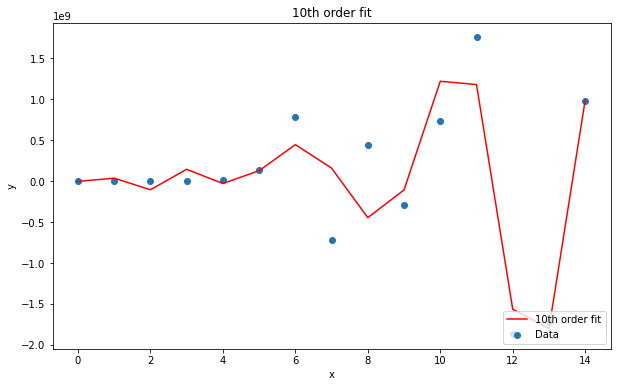

In [97]:
# Plotting the data from 10th order noisy target and the 10th-order fit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred_i_10, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("10th order fit")
plt.legend(["10th order fit","Data"], loc ="lower right")
plt.show()

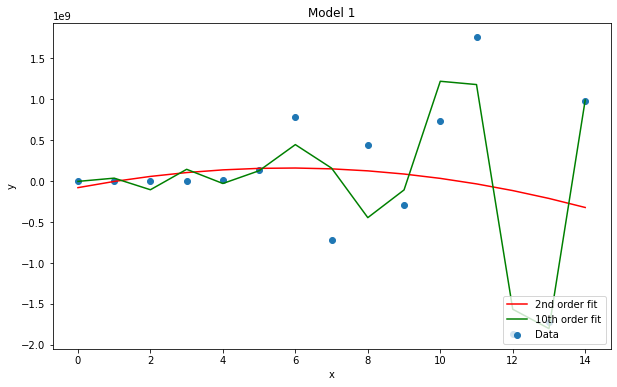

In [98]:
# Plotting the data from 10th order noisy target, 2nd order fit, 10th-order fit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred_i_2, c="red")
plt.plot(X,Y_pred_i_10, c="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 1")
plt.legend(["2nd order fit", "10th order fit","Data"], loc ="lower right")
plt.show()

#### Performance Analysis for Model 2: 50th-order target (Noiseless high-order target)

In [99]:
#Generating Data for training
N=15
X,Y=data_generator_2(N,50)
#Generating Data for testing
N_test=1000
X_test,Y_test=data_generator_2(N_test,50)

C:\Users\Sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in long_scalars


In [100]:
# Training and Fitting a second degree polynomial to above dataset
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_poly, Y)
Y_pred_i_2=pol_reg_model.predict(X_poly)
Y_pred_o_2=pol_reg_model.predict(X_poly_test)

#In-Sample and Out-of-Sample errors for 2nd-degree fit
print("In-Sample error for 2nd Order fit:", mean_squared_error(Y_pred_i_2,Y))
print("Out-of-Sample error for 2nd Order fit:", mean_squared_error(Y_pred_o_2,Y_test))

In-Sample error for 2nd Order fit: 8.464659641446249e+17
Out-of-Sample error for 2nd Order fit: 1.431751514171513e+25


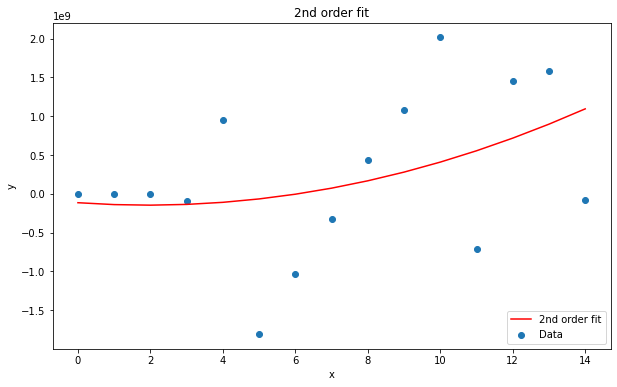

In [106]:
# Plotting the data from 50th order noiseless target and the 2nd-order fit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred_i_2, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("2nd order fit")
plt.legend(["2nd order fit","Data"], loc ="lower right")
plt.show()

In [107]:
# Training and Fitting a tenth degree polynomial to above dataset
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_poly, Y)
Y_pred_i_10=pol_reg_model.predict(X_poly)
Y_pred_o_10=pol_reg_model.predict(X_poly_test)

#In-Sample and Out-of-Sample errors for 10th-degree fit
print("In-Sample error for 10th Order fit:", mean_squared_error(Y_pred_i_10,Y))
print("Out-of-Sample error for 10th Order fit:", mean_squared_error(Y_pred_o_10,Y_test))

In-Sample error for 10th Order fit: 3.1202602524869574e+17
Out-of-Sample error for 10th Order fit: 6.4234903347367606e+63


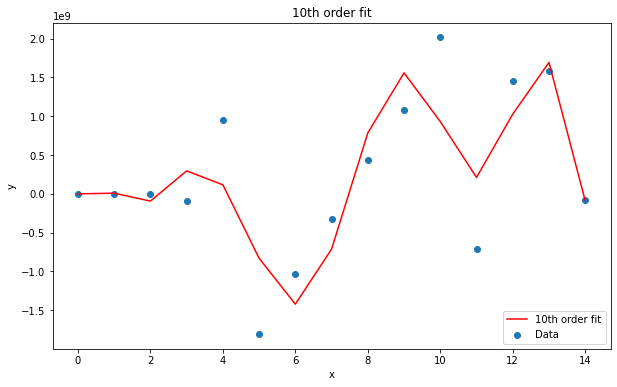

In [108]:
# Plotting the data from 50th order noiseless target and the 10th-order fit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred_i_10, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("10th order fit")
plt.legend(["10th order fit","Data"], loc ="lower right")
plt.show()

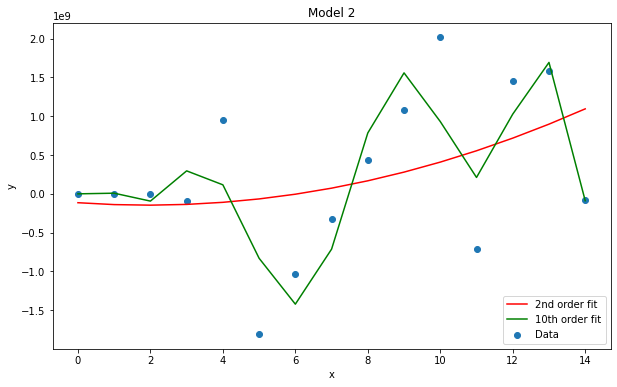

In [109]:
# Plotting the data from 50th order noiseless target, 2nd order fit, 10th-order fit
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred_i_2, c="red")
plt.plot(X,Y_pred_i_10, c="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 2")
plt.legend(["2nd order fit", "10th order fit","Data"], loc ="lower right")
plt.show()

#### Observations:
1. We generate 2 Models to compare the overfitting scenarios. Model 1 is a 10th order target with noise added (Noisy low-order target) and Model 2 is a 50th order target with no noise (Noiseless high-order target).
2. x takes evenly-spaced values between 0 and n and the coefficients of higher order terms are suitably chosen.The error is assumed to be gaussian and the datasets for training and testing are generated separately.
3. The 2nd order and 10th order polynomials are fit using the Polynomial Features class for both the models and the fit regression model is used to predict on the test set. The In-sample and Out-of-sample errors are observed when the two polynomials are fit for the two models.
4. For Model 1, We observe that the out-of sample error is greater than the in-sample error for the 2nd order fit. This happens because the model was trained on the noisy data and fit on the test set sampled from the actual 10th order target.
5. For Model 1, We observe that the in-sample error of 10th order fit is lesser than the in-sample error of the 2nd order fit. This happens because the 10th order tries to fit the data and the noise using all of its degrees of freedom and thus produces a better fit or a lower error.
6. For Model 1, We observe that the out-of sample error is greater than the in-sample error for the 10th order fit. This happens because the model was trained on the noisy data and fit on the test set sampled from the actual 10th order target.
7. For Model 1, We observe that the out-of sample error for 10th order fit is much greater than any of the 4 in-sample or out of sample errors. This exhibits a primary case of **overfitting**, arising mainly due to the stochastic noise incorporated before.
8. We observe that when we move from a 2nd order fit to a 10th order fit, the **In-sample error reduces** but the **Out-of sample error rises**.
9. When we fit the noise in-sample, the learning algorithm gets a new pattern and extrapolates it out-of sample, thus hurting the performance.
10. For Model 2, We observe that the out-of sample error is greater than the in-sample error for the 2nd order fit. 
11. For Model 2, We observe that the in-sample error of 10th order fit is much lesser than the in-sample error of the 2nd order fit. This happens because the 10th order tries to fit the data as much as possible using all of its degrees of freedom and thus produces a better fit or a lower error.
12. For Model 2, We observe that the out-of sample error for 10th order fit is much greater in magnitude than any of the 4 in-sample or out of sample errors. This exhibits a primary case of overfitting galore.
13. The huge out-of sample error for 10th order fit of Model 2 arises mainly due to deterministic noise due to a higher complexity target. 

#### References:

1. CalTech:Lecture 11, Overfitting, https://www.youtube.com/watch?v=EQWr3GGCdzw&t=889s
2. Polynomial Regression in Python, https://data36.com/polynomial-regression-python-scikit-learn/